In [1]:
import pathlib
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt


import statsmodels.api as sm
from statsmodels.formula.api import mixedlm, ols
import statsmodels.formula.api as smf
from astropy.stats import circcorrcoef
from statsmodels.stats.multitest import multipletests

import SessionTools.two_photon as st2p
import NeuromodPlasticity as nmp

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 

%matplotlib inline

In [5]:
common_fig_folder = pathlib.Path('/media/mplitt/SSD_storage/fig_scratch/GRAB')
common_fig_folder.mkdir(exist_ok=True, parents=True)

grabda_sess = nmp.grab_sensors.SessMaker(basedir = '/media/mplitt/SSD_storage/2P_scratch/R20A02_R56H10_split_GRABDA2m',
                                         figfolder=common_fig_folder / 'GRABDA2m',
                                         id_suffix='DA')

graboa_sess = nmp.grab_sensors.SessMaker(basedir = '/media/mplitt/SSD_storage/2P_scratch/R20A02_R56H10_split_GRABOA1',
                                         figfolder=common_fig_folder / 'GRABOA1',
                                        id_suffix='OA')



In [7]:
da_stats_df = nmp.grab_sensors.offset_stats(grabda_sess)
da_stats_df_unique = nmp.grab_sensors.offset_stats_unique(da_stats_df)
da_stats_df_plot = nmp.grab_sensors.offset_stats_plot(da_stats_df_unique)

oa_stats_df = nmp.grab_sensors.offset_stats(graboa_sess)
oa_stats_df_unique = nmp.grab_sensors.offset_stats_unique(oa_stats_df)
oa_stats_df_plot = nmp.grab_sensors.offset_stats_plot(oa_stats_df_unique)


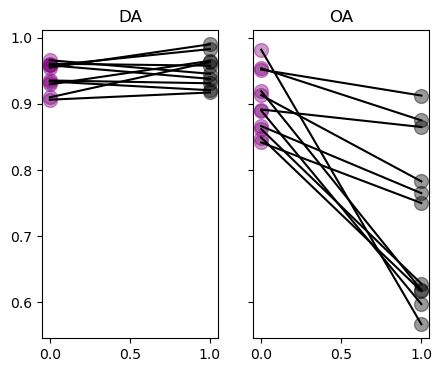

In [9]:
fig,ax = plt.subplots(1,2,sharey=True, figsize=[5,4])

ax[0].set_title('DA')
ax[0].plot([0,1], da_stats_df_plot[['offset_var_dark', 'offset_var_closed_loop']].T, color='black')
ax[0].scatter(np.zeros((da_stats_df_plot.shape[0],)), da_stats_df_plot['offset_var_dark'], color='purple', alpha=.4, s=100)
ax[0].scatter(np.ones((da_stats_df_plot.shape[0],)), da_stats_df_plot['offset_var_closed_loop'], color='black', alpha=.4, s=100)

ax[1].set_title('OA')
ax[1].plot([0,1], oa_stats_df_plot[['offset_var_dark', 'offset_var_closed_loop']].T, color='black')
ax[1].scatter(np.zeros((oa_stats_df_plot.shape[0],)), oa_stats_df_plot['offset_var_dark'], color='purple', alpha=.4, s=100)
ax[1].scatter(np.ones((oa_stats_df_plot.shape[0],)), oa_stats_df_plot['offset_var_closed_loop'], color='black', alpha=.4, s=100)


In [ ]:
dh_bins = np.linspace(0, 3.14, num=20)

da_stats = nmp.grab_sensors.rho_stats(grabda_sess, dh_bins=dh_bins)
da_stats.loc[da_stats['cl'] > 1, 'cl'] = 1

# Group by 'fly_id' and 'cl' and apply the lambda function to both 'F_dig' and 'rho_dig'
da_grouped = da_stats.groupby(['fly_id', 'cl']).apply(
    lambda x: pd.Series({
        'F_dig': np.nanmean(np.stack(x['F_dig']), axis=0),
        'rho_dig': np.nanmean(np.stack(x['rho_dig']), axis=0)
    })
).reset_index()

da_grouped